In [134]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
pn.extension('plotly')
import plotly.express as px
import seaborn as sns
import os
import datetime as dt
from pathlib import Path
import hvplot.pandas

%matplotlib inline

## Initial Data

In [178]:
# Reading network difficulty tables
#Link to BTC datasets: https://www.blockchain.com/charts/difficulty
#Link to ETH datasets: https://bitinfocharts.com/comparison/ethereum-difficulty.html
btc_network_difficulty = Path("Raw_Data/BTC/difficulty.csv")
btc_difficulty = pd.read_csv(btc_network_difficulty,  
                        infer_datetime_format = True, 
                        parse_dates = True
                       )
btc_difficulty.sort_index(inplace = True)
btc_difficulty.head(5)

eth_network_difficulty = Path("Raw_Data/ETH/export-BlockDifficulty.csv")
eth_difficulty = pd.read_csv(eth_network_difficulty,  
                        infer_datetime_format = True, 
                        parse_dates = True
                       )
eth_difficulty.sort_index(inplace = True)
eth_difficulty.head(5)

,Time Stamp,UnixTimeStamp,Difficulty
0,7/31/2015,1438300800,0.603
1,8/1/2015,1438387200,0.887
2,8/2/2015,1438473600,1.020
3,8/3/2015,1438560000,1.126
4,8/4/2015,1438646400,1.217


In [179]:
# Reading hash rate tables
btc_hash_rate = Path("Raw_Data/BTC/hash_rate.csv")
btc_hashrate = pd.read_csv(btc_hash_rate,  
                        infer_datetime_format = True, 
                        parse_dates = True
                       )
btc_hashrate.sort_index(inplace = True)
btc_hashrate.head(5)

eth_hash_rate = Path("Raw_Data/ETH/export-NetworkHash.csv")
eth_hashrate = pd.read_csv(eth_hash_rate,  
                        infer_datetime_format = True, 
                        parse_dates = True
                       )
eth_hashrate.sort_index(inplace = True)
eth_hashrate.head(5)

,Date(UTC),UnixTimeStamp,Hash Rate
0,7/31/2015,1438300800,51.4594
1,8/1/2015,1438387200,57.7845
2,8/2/2015,1438473600,67.9224
3,8/3/2015,1438560000,74.5737
4,8/4/2015,1438646400,82.0352


In [180]:
# Count nulls
b1 = btc_difficulty.isnull().sum()
e1 = eth_difficulty.isnull().sum()
b2 = btc_hashrate.isnull().sum()
e2 = eth_hashrate.isnull().sum()
#No nulls found in this dataset, as expected

In [181]:
#Drop unnecessary columns
e_diff = eth_difficulty.drop('UnixTimeStamp', axis = 1)
e_hash = eth_hashrate.drop('UnixTimeStamp', axis = 1)

In [182]:
# Check Data Types
e_diff.dtypes

Time Stamp     object
Difficulty    float64
dtype: object

In [142]:
# Check Data Types
e_hash.dtypes

Date(UTC)     object
Hash Rate    float64
dtype: object

## Combine Bitcoin labeled data & Ethereum labeled data

In [166]:
# Join Bitcoins Hash Rate and Network Difficulty, and drop extra columns
bitcoin = pd.concat([btc_difficulty, 
                    btc_hashrate],  
                    axis = "columns", 
                    join = "inner")
btc = bitcoin.drop('Timestamp', axis = 1)
btc = btc.set_index('Time Stamp')
btc = btc.rename(columns={"Difficulty": "BTC Difficulty", "Hash Rate": "BTC Hash Rate"}, errors="raise")
btc.head(5)

,BTC Difficulty,BTC Hash Rate
Time Stamp,,
2015-07-31 01:00:00,5.227830e+10,361228.839522
2015-08-03 01:00:00,5.227830e+10,382018.988559
2015-08-06 01:00:00,5.227830e+10,363827.608152
2015-08-09 01:00:00,5.269984e+10,353662.655707
2015-08-12 01:00:00,5.269984e+10,322225.975200


In [167]:
# Join Ethereums Hash Rate and Network Difficulty, and drop extra columns
ethereum = pd.concat([e_diff, 
                    e_hash],  
                    axis = "columns", 
                    join = "inner")
eth = ethereum.drop('Date(UTC)', axis = 1)
eth = eth.set_index('Time Stamp')
eth = eth.rename(columns = {"Difficulty": "ETH Difficulty", "Hash Rate": "ETH Hash Rate"}, errors="raise")
eth.head(5)

,ETH Difficulty,ETH Hash Rate
Time Stamp,,
7/31/2015,0.603,51.4594
8/1/2015,0.887,57.7845
8/2/2015,1.020,67.9224
8/3/2015,1.126,74.5737
8/4/2015,1.217,82.0352


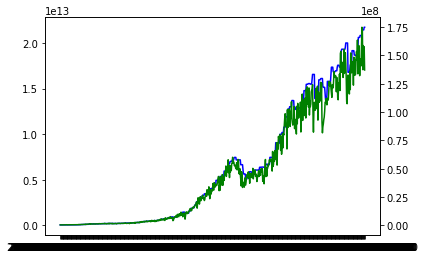

In [169]:
# Create a twin axis line chart for visualization
# BTC Network Difficulty vs Hash rate
xb = btc.index
yb1 = btc['BTC Difficulty']
yb2 = btc['BTC Hash Rate']

fig, dfx1 = plt.subplots()
dfx2 = dfx1.twinx()

plot1 = dfx1.plot(xb, yb1, label = 'BTC Difficulty', color = 'b')
plot2 = dfx2.plot(xb, yb2, label = 'BTC Hash Rate', color = 'g')

plt.plot()
plt.show()

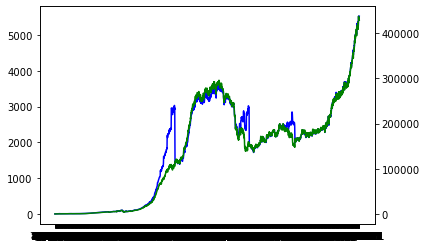

In [170]:
# Create a twin axis line chart for visualization
# BTC Network Difficulty vs BTC Network Difficulty
xb = eth.index
yb1 = eth['ETH Difficulty']
yb2 = eth['ETH Hash Rate']

fig, dfx1 = plt.subplots()
dfx2 = dfx1.twinx()

plot1 = dfx1.plot(xb, yb1, label = 'ETH Difficulty', color = 'b')
plot2 = dfx2.plot(xb, yb2, label = 'ETH Hash Rate', color = 'g')

plt.plot()
plt.show()

---

In [173]:
#Combine datasets

crypto_combined = pd.concat([eth, 
                    btc],  
                    axis = "columns", 
                    join = "outer")
crypto_combined

,ETH Difficulty,ETH Hash Rate,BTC Difficulty,BTC Hash Rate
7/31/2015,0.603,51.4594,NaN,NaN
8/1/2015,0.887,57.7845,NaN,NaN
8/2/2015,1.020,67.9224,NaN,NaN
8/3/2015,1.126,74.5737,NaN,NaN
8/4/2015,1.217,82.0352,NaN,NaN
...,...,...,...,...
2021-02-11 00:00:00,NaN,NaN,2.143440e+13,1.374507e+08
2021-02-14 00:00:00,NaN,NaN,2.143440e+13,1.587609e+08
2021-02-17 00:00:00,NaN,NaN,2.143440e+13,1.470403e+08
2021-02-20 00:00:00,NaN,NaN,2.172413e+13,1.576672e+08


In [ ]:
# Create a twin axis line chart for visualization
# BTC Network Difficulty vs BTC Network Difficulty
xb = eth.index
yb1 = eth['Difficulty']
yb2 = eth['Hash Rate']

fig, dfx1 = plt.subplots()
dfx2 = dfx1.twinx()

plot1 = dfx1.plot(xb, yb1, label = 'Difficulty', color = 'b')
plot2 = dfx2.plot(xb, yb2, label = 'Hash Rate', color = 'g')

plt.plot()
plt.show()

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Boxplot Visualization'}>

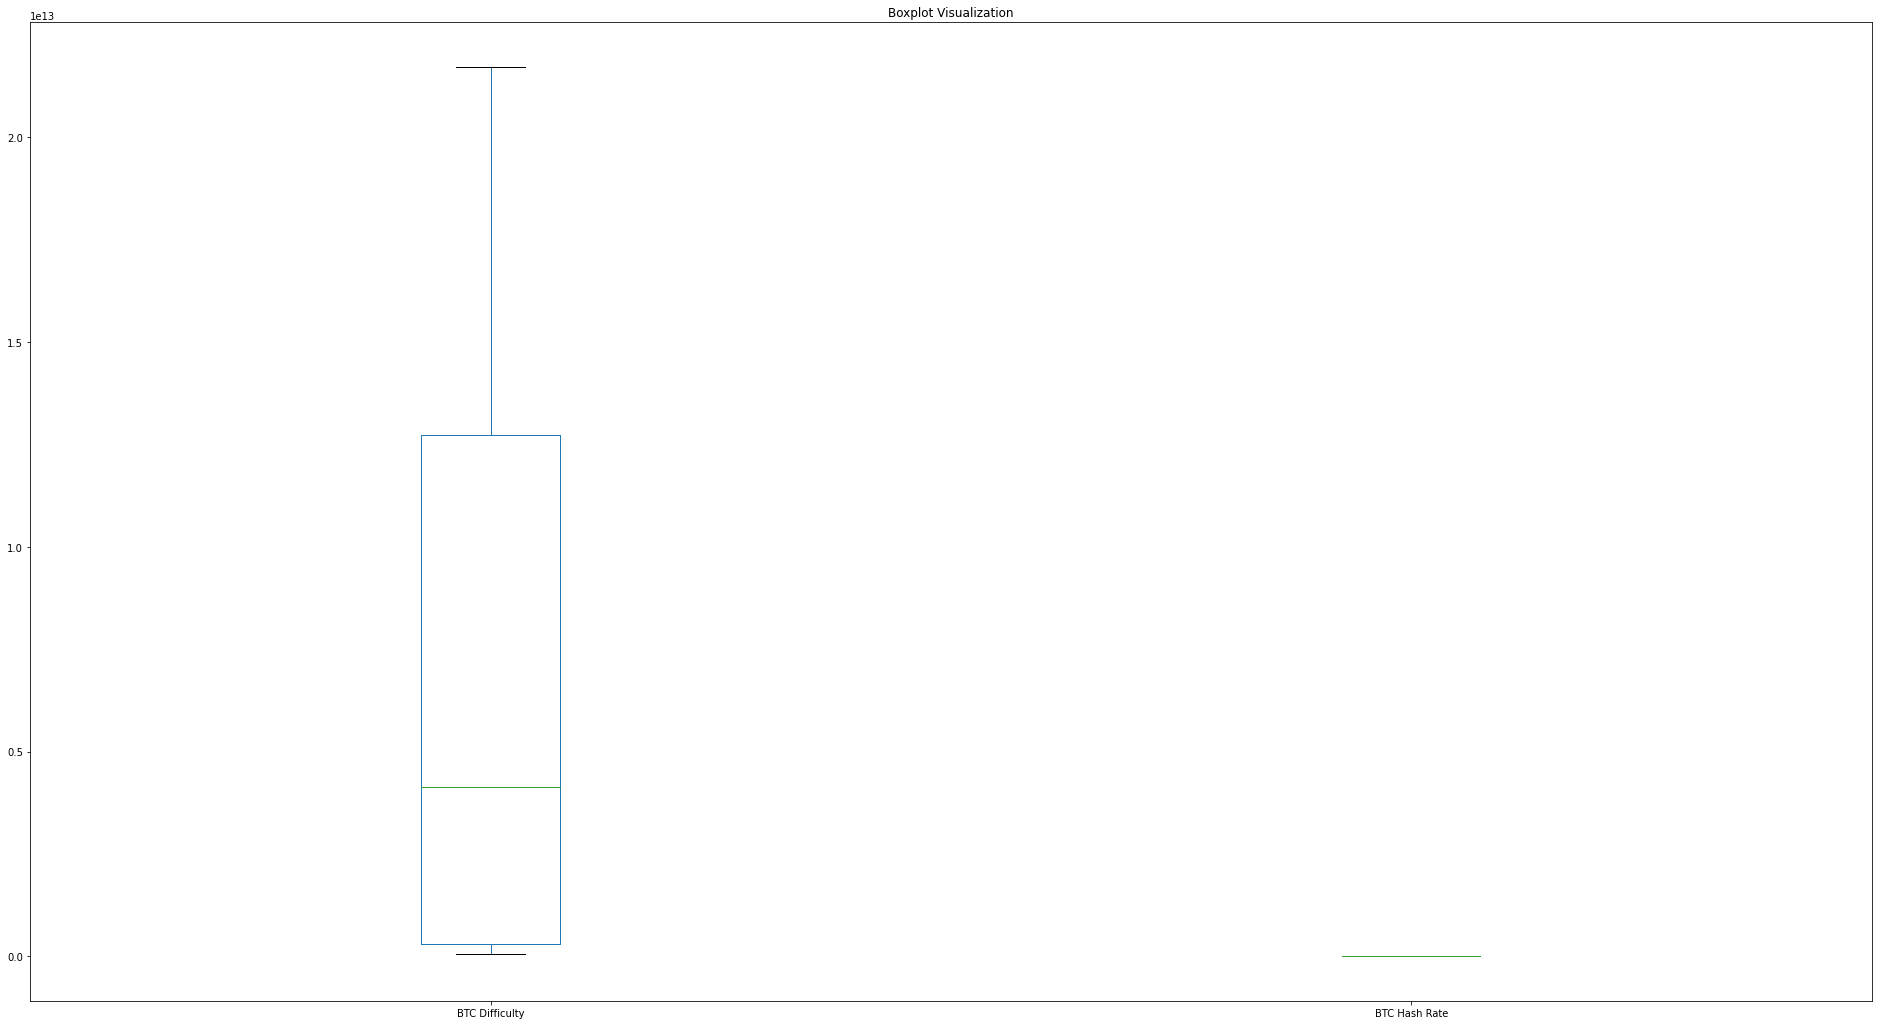

In [188]:
# Box plot to visually show risk
btc.plot.box(figsize = (14, 7), title = "Boxplot Visualization")

<AxesSubplot:title={'center':'Boxplot Visualization'}>

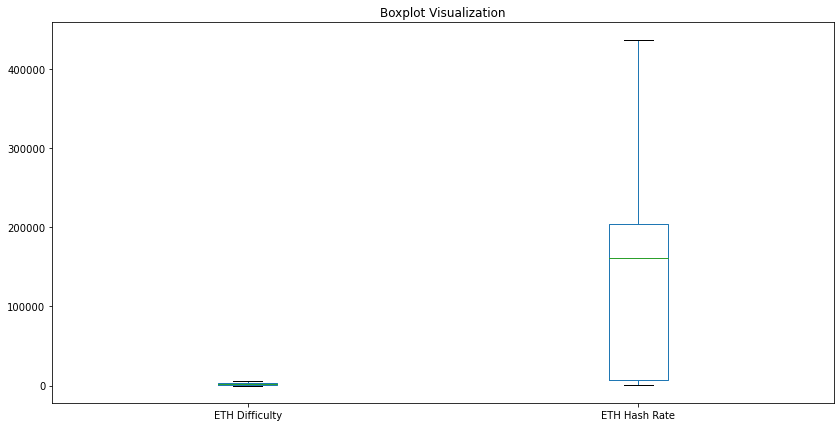

In [189]:
# Box plot to visually show risk
eth.plot.box(figsize = (14, 7), title = "Boxplot Visualization")

### Calculate Standard Deviations

In [84]:
# Calculate the daily standard deviations of all portfolios
btc['Hash Rate'].std()

39777495.58836856

### Determine which portfolios are riskier than the S&P 500

---

## Rolling Statistics

Calculate and plot the rolling standard deviation for BTC and ETH using a rolling period of 30 days


### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'30 - Day Rolling Standard Deviation - BTC Hash Rate.'}, xlabel='Time Stamp'>

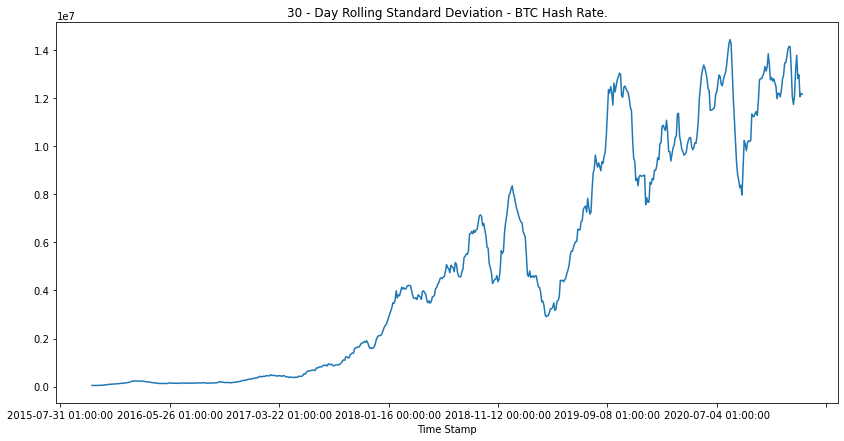

In [184]:
# Calculate the rolling standard deviation for BTC hash rate
btc.rolling(window = 21).std()
# Plot the rolling standard deviation
btc_std = btc['BTC Hash Rate'].rolling(window = 30).std()
btc_std.plot(figsize = (14, 7), title = "30 - Day Rolling Standard Deviation - BTC Hash Rate.")

<AxesSubplot:title={'center':'30 - Day Rolling Standard Deviation - ETH Hash Rate.'}, xlabel='Time Stamp'>

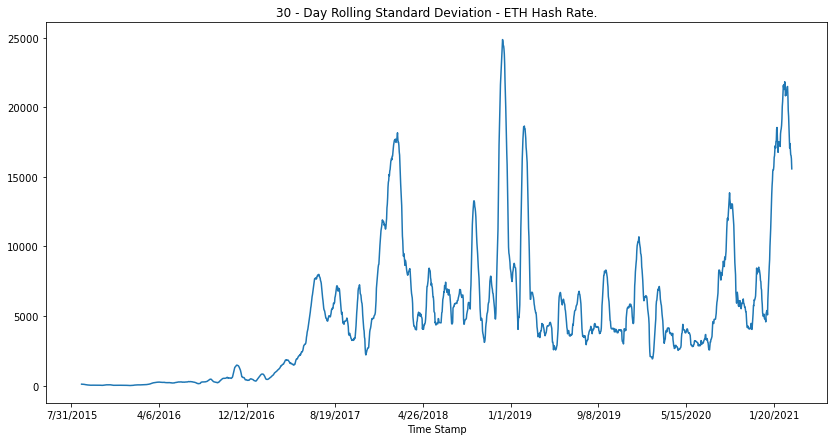

In [185]:
# Calculate the rolling standard deviation for ETH hash rate
eth.rolling(window = 21).std()
# Plot the rolling standard deviation
eth_std = eth['ETH Hash Rate'].rolling(window = 30).std()
eth_std.plot(figsize = (14, 7), title = "30 - Day Rolling Standard Deviation - ETH Hash Rate.")

### Calculate and plot the correlation

<AxesSubplot:>

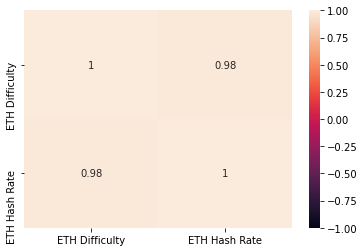

In [187]:
# Calculate the correlation
correlation = eth.corr()
# Display de correlation matrix
sns.heatmap(correlation,
           vmin = -1,
           vmax = 1,
           annot = True,
           )

### Calculate and Plot Beta for a chosen portfolio and the S&P 500